# Python On Resonance (PyOR)
## Everybody can simulate NMR

Author: Vineeth Thalakottoor 

Email: vineethfrancis.physics@gmail.com

## Tutorial 17: Radiation Damping Part 3 Two Spin Maser (Uncoupled)
In this tutorial I will show maser from two uncoupled proton spins with close Larmor Frequiencies. An example from our paper Multi-mode masers of thermally polarized nuclear spins in solution NMR, https://arxiv.org/abs/2404.03562

In [17]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append('/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_v1.0/Source')

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
"""
Options: %matplotlib qt, %matplotlib notebook
""";
import sympy as sp
from sympy import *

## Generating Spin System

In [18]:
# Define Spin quantum numbers of individual spins
Slist1 = [1/2,1/2]

In [19]:
# Generate Spin Operator
hbarEQ1 = True # If True, hbar = 1
System = PyOR.Numerical_MR(Slist1,hbarEQ1)
Sx,Sy,Sz = System.SpinOperator()
Sp,Sm = System.PMoperators(Sx,Sy)

## Zeeman Halitonian in Rotating Frame

In [20]:
Gamma = [System.gammaH1,System.gammaH1]
B0 = 9.4 # Tesla, Static Magnetic field (B0) along Z
Offset = [10.0,11.3] # Offset frequency in Hz
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)

Larmor Frequency in MHz:  [-400.22802765 -400.22802895]


In [21]:
OmegaRF = [-System.gammaH1*B0,-System.gammaH1*B0]
Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF)

## J Coupling Hamiltonian

In [22]:
'''
Define J couplings between individual spins
'''
Jlist = np.zeros((len(Slist1),len(Slist1)))
Jlist[0][1] = 0.0
Hj = System.Jcoupling(Jlist,Sx,Sy,Sz)

## Initialize Density Matrix

In [23]:
Thermal_DensMatrix = False 

if Thermal_DensMatrix:
    Hz_EnUnit = System.Convert_FreqUnitsTOEnergy(Hz)
    HT_approx = False # High Temperature Approximation is False
    T = 300 # Temperature in Kelvin
    rho_in = System.EqulibriumDensityMatrix(Hz_EnUnit,T,HT_approx)
    rhoeq = rho_in.copy()   
else:
    rho_in = np.sum(Sz,axis=0) # Initial Density Matrix
    rhoeq = np.sum(Sz,axis=0)  # Equlibrium Density Matrix   
    print("Trace of density metrix = ", np.trace(rho_in))

Trace of density metrix =  0j


## Relaxation Constant

In [24]:
# Define longitudinal and transverse Relaxation
R1 = 1.0
R2 = 2.0
System.Relaxation_Constants(R1,R2)
#Rprocess = "Random Field Fluxtuation"
Rprocess = "Phenomenological"

## Pulse

In [25]:
rho = System.Rotate_H(rho_in,10.0,Sy[0]) 

## Delay

In [26]:
dt = 0.001

if False:
    delay = 1/(4.0 * Jlist[0][1])
    Dpoints = int(delay/dt)
    print("Npoints = ", Dpoints)
    method = "Unitary Propagator"

    start_time = time.time()
    t, rho_t = System.Evolution_H(rhoeq,rho,Sx,Sy,Sz,Sp,Sm,Hz+Hj,dt,Dpoints,method,Rprocess)
    end_time = time.time()
    timetaken = end_time - start_time
    print("Total time = %s seconds " % (timetaken))
    rho = rho_t[-1]    

## Radiation Damping Parameters

In [27]:
RDgain = [14,14]
RDphase = [180,180]
Rdamping = True
System.RDparameters(RDgain,RDphase,Rdamping)

## Evolution (Need ODE Solver)

In [28]:
AQ = 30.0
Npoints = int(AQ/dt)
method = "ODE Solver"

start_time = time.time()
t, rho_t = System.Evolution_H(rhoeq,rho,Sx,Sy,Sz,Sp,Sm,Hz+Hj,dt,Npoints,method,Rprocess)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 16.07361912727356 seconds 


## Expectation Value

In [29]:
det = np.sum(Sx,axis=0) + 1j * np.sum(Sy,axis=0)

t, signal = System.Expectation_H(rho_t,det,dt,Npoints)

## Fourier Spectrum

In [30]:
fs = 1.0/dt
freq, spectrum = System.FourierTransform(signal,fs,1)

## Ploting

<IPython.core.display.Javascript object>


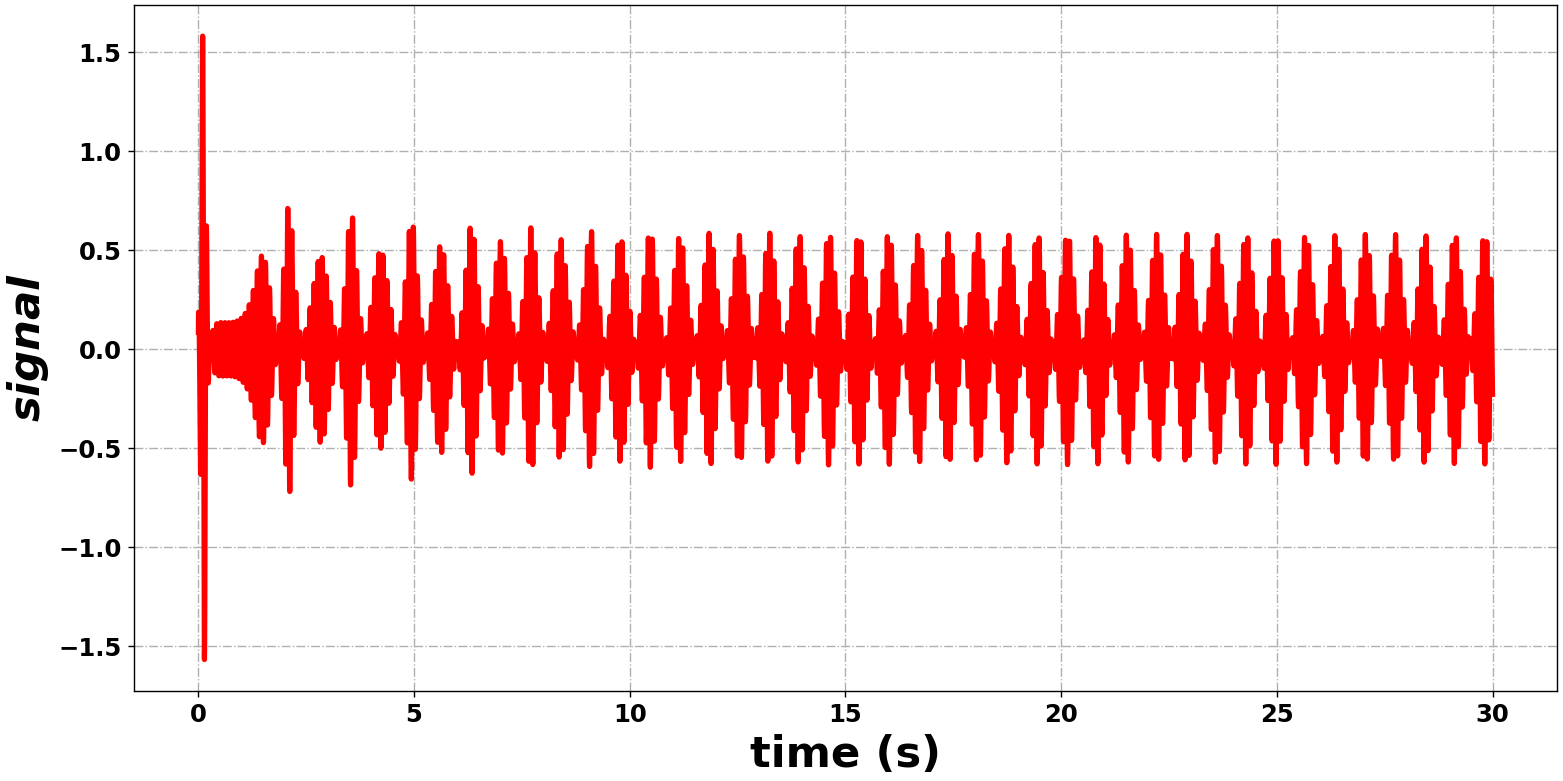

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


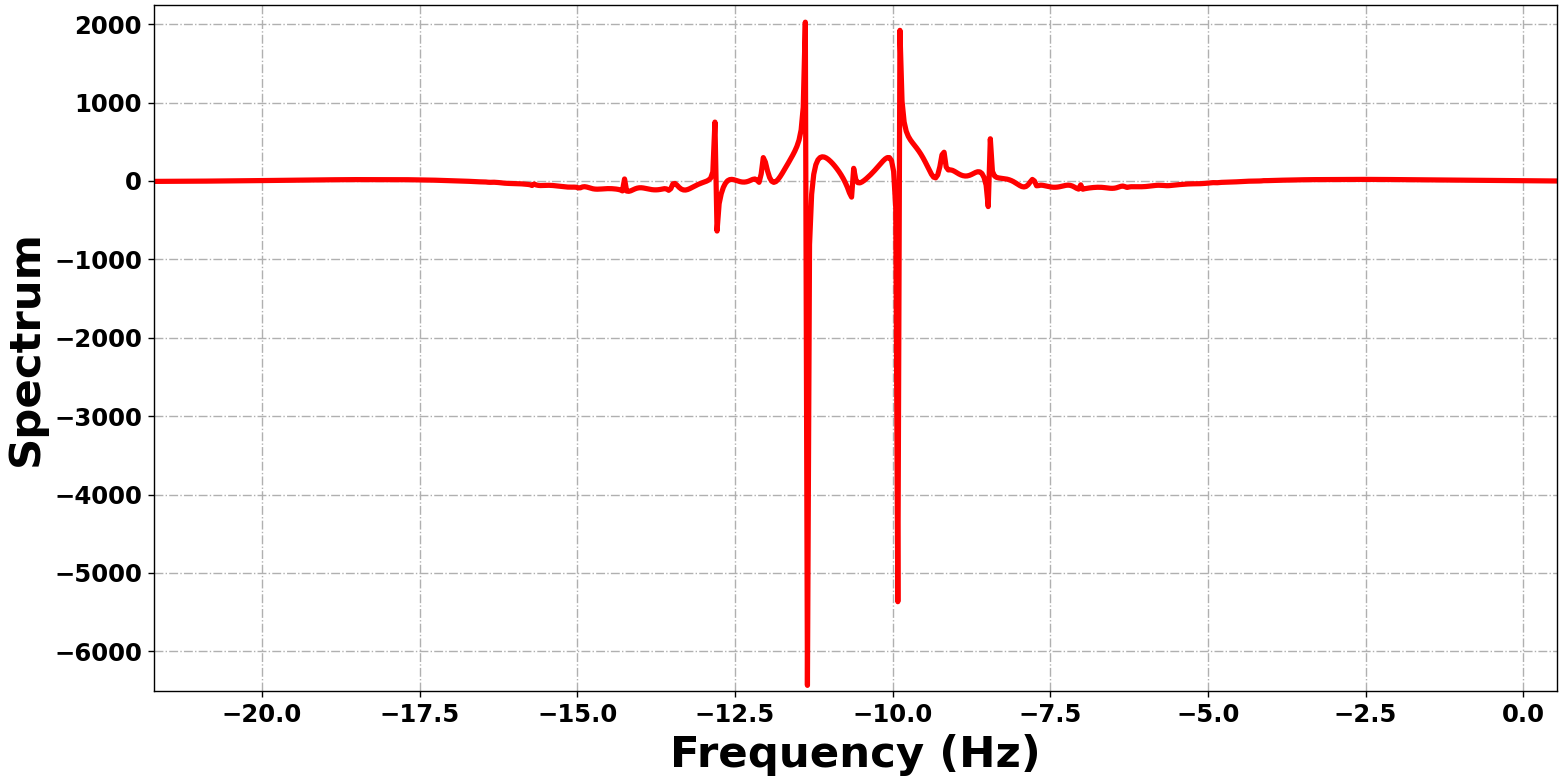

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [31]:
System.Plotting(7,t,signal,"time (s)",r"$signal$","red")
System.Plotting(8,freq,spectrum,"Frequency (Hz)",r"Spectrum","red")

## Multi-mode Analyzer

<IPython.core.display.Javascript object>


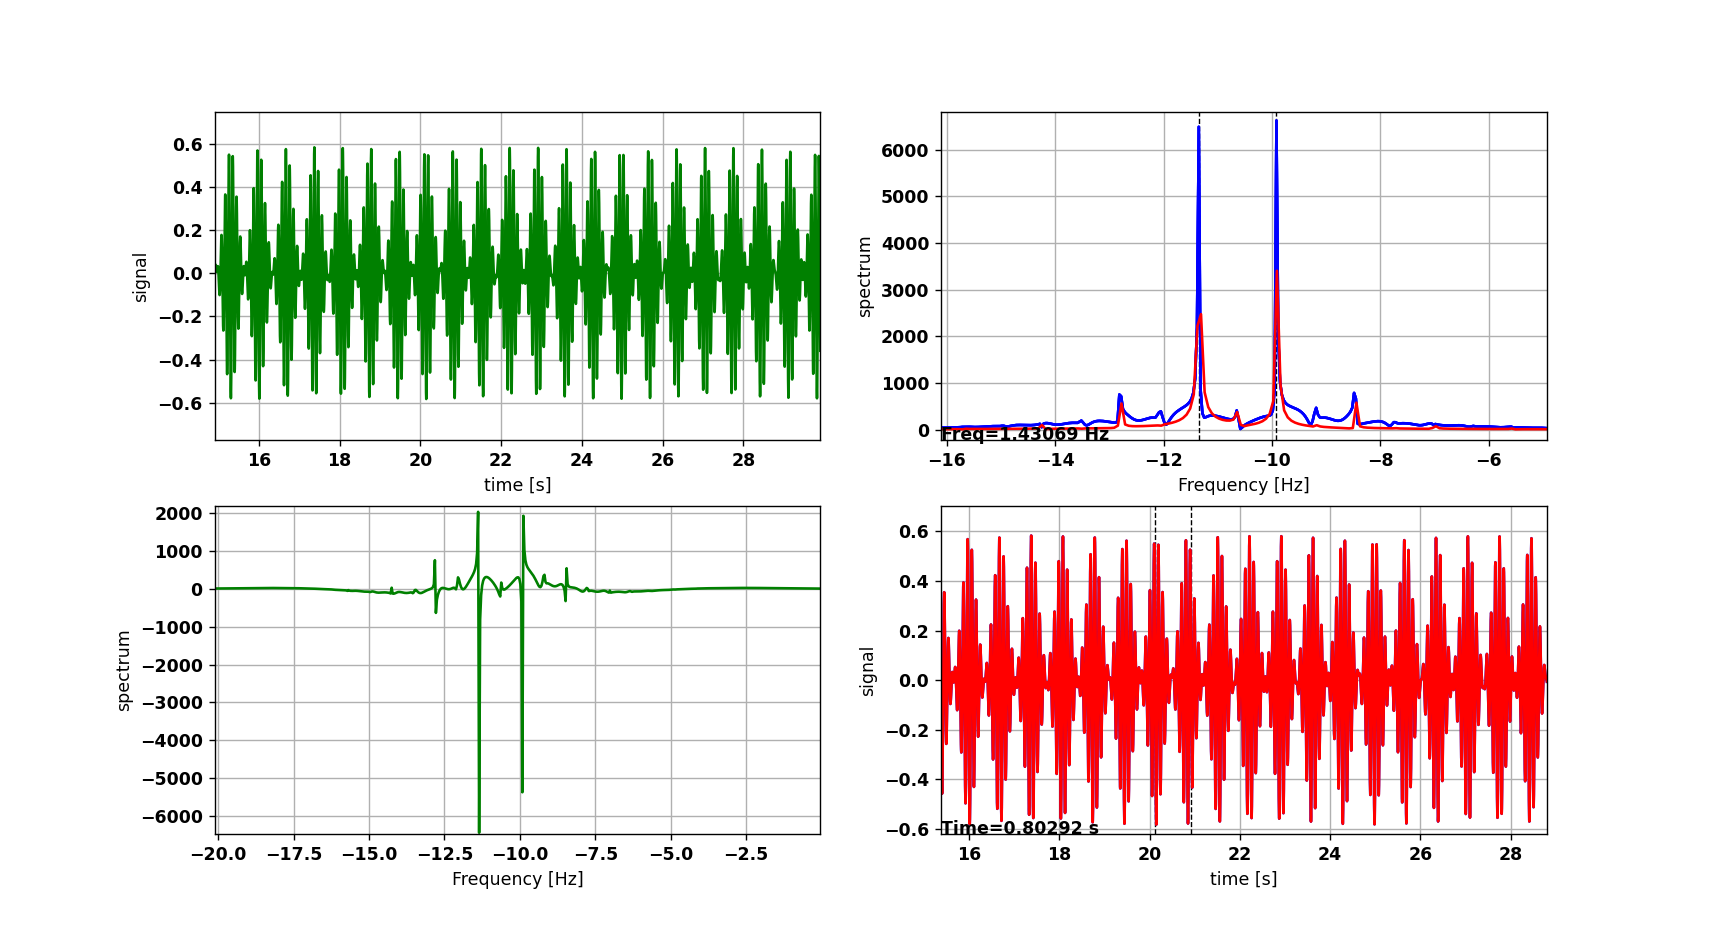

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [32]:
fig, fourier = System.PlottingMultimodeAnalyzer(t,freq,signal,spectrum)

## Any suggestion? write to me
If you see something is wrong please write to me, so that the PyOR can be error free. 

vineethfrancis.physics@gmail.com